Curve fitting is a type of optimization that finds an optimal set of parameters for a defined function that best fits a given set of observations.

Unlike supervised learning, curve fitting requires that you define the function that maps examples of inputs to outputs.

The mapping function, also called the basis function can have any form you like, including a straight line (linear regression), a curved line (polynomial regression), and much more. This provides the flexibility and control to define the form of the curve, where an optimization process is used to find the specific optimal parameters of the function.

In this tutorial, you will discover how to perform curve fitting in Python.

After completing this tutorial, you will know:

Curve fitting involves finding the optimal parameters to a function that maps examples of inputs to outputs.
The SciPy Python library provides an API to fit a curve to a dataset.
How to use curve fitting in SciPy to fit a range of different curves to a set of observations.

In [1]:
import numpy as np
import numpy as arrange
from numpy import array, exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 

Tutorial Overview
This tutorial is divided into three parts; they are:

    Curve Fitting
    Curve Fitting Python API
    Curve Fitting Worked Example

Curve Fitting
Curve fitting is an optimization problem that finds a line that best fits a collection of observations.

It is easiest to think about curve fitting in two dimensions, such as a graph.

Consider that we have collected examples of data from the problem domain with inputs and outputs.

The x-axis is the independent variable or the input to the function. The y-axis is the dependent variable or the output of the function. We don’t know the form of the function that maps examples of inputs to outputs, but we suspect that we can approximate the function with a standard function form.

Curve fitting involves first defining the functional form of the mapping function (also called the basis function or objective function), then searching for the parameters to the function that result in the minimum error.

Error is calculated by using the observations from the domain and passing the inputs to our candidate mapping function and calculating the output, then comparing the calculated output to the observed output.

Once fit, we can use the mapping function to interpolate or extrapolate new points in the domain. It is common to run a sequence of input values through the mapping function to calculate a sequence of outputs, then create a line plot of the result to show how output varies with input and how well the line fits the observed points.

The key to curve fitting is the form of the mapping function.

A straight line between inputs and outputs can be defined as follows:

y = a * x + b
Where y is the calculated output, x is the input, and a and b are parameters of the mapping function found using an optimization algorithm.

This is called a linear equation because it is a weighted sum of the inputs.

In a linear regression model, these parameters are referred to as coefficients; in a neural network, they are referred to as weights.

This equation can be generalized to any number of inputs, meaning that the notion of curve fitting is not limited to two-dimensions (one input and one output), but could have many input variables.

For example, a line mapping function for two input variables may look as follows:

y = a1 * x1 + a2 * x2 + b
The equation does not have to be a straight line.

We can add curves in the mapping function by adding exponents. For example, we can add a squared version of the input weighted by another parameter:

y = a * x + b * x^2 + c
This is called polynomial regression, and the squared term means it is a second-degree polynomial.

So far, linear equations of this type can be fit by minimizing least squares and can be calculated analytically. This means we can find the optimal values of the parameters using a little linear algebra.

We might also want to add other mathematical functions to the equation, such as sine, cosine, and more. Each term is weighted with a parameter and added to the whole to give the output; for example:

y = a * sin(b * x) + c
Adding arbitrary mathematical functions to our mapping function generally means we cannot calculate the parameters analytically, and instead, we will need to use an iterative optimization algorithm.

This is called nonlinear least squares, as the objective function is no longer convex (it’s nonlinear) and not as easy to solve.

Now that we are familiar with curve fitting, let’s look at how we might perform curve fitting in Python.



Curve Fitting Python API
We can perform curve fitting for our dataset in Python.

The SciPy open source library provides the curve_fit() function for curve fitting via nonlinear least squares.

The function takes the same input and output data as arguments, as well as the name of the mapping function to use.

The mapping function must take examples of input data and some number of arguments. These remaining arguments will be the coefficients or weight constants that will be optimized by a nonlinear least squares optimization process.

For example, we may have some observations from our domain loaded as input variables x and output variables y.

In [2]:
# load input variables from a file
x_values = ...
y_values = ...

Next, we need to design a mapping function to fit a line to the data and implement it as a Python function that takes inputs and the arguments.

It may be a straight line, in which case it would look as follows:

In [3]:
# objective function
def objective(x, a, b, c):
	return a * x + b

We can then call the curve_fit() function to fit a straight line to the dataset using our defined function.

The function curve_fit() returns the optimal values for the mapping function, e.g, the coefficient values. It also returns a covariance matrix for the estimated parameters, but we can ignore that for now.

Once fit, we can use the optimal parameters and our mapping function objective() to calculate the output for any arbitrary input.

This might include the output for the examples we have already collected from the domain, it might include new values that interpolate observed values, or it might include extrapolated values outside of the limits of what was observed.

Curve Fitting Worked Example
We will develop a curve to fit some real world observations of economic data.

In this example, we will use the so-called “Longley’s Economic Regression” dataset; you can learn more about it here:

Longley’s Economic Regression (longley.csv)
Longley’s Economic Regression Description (longley.names)
We will download the dataset automatically as part of the worked example.

There are seven input variables and 16 rows of data, where each row defines a summary of economic details for a year between 1947 to 1962.

In this example, we will explore fitting a line between population size and the number of people employed for each year.

The example below loads the dataset from the URL, selects the input variable as “population,” and the output variable as “employed” and creates a scatter plot.

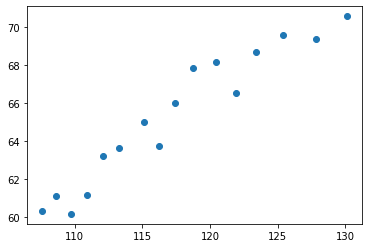

In [4]:
# plot "Population" vs "Employed"
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
# choose the input and output variables
x, y = data[:, 4], data[:, -1]
# plot input vs output
pyplot.scatter(x, y)
pyplot.show()

#We can see that there is a relationship between the two variables. Specifically, that as the 
#population increases, the total number of employees increases.

In [5]:
# define the true objective function
def objective(x, a, b):
	return a * x + b

In [6]:
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

# We can use curve fitting to find the optimal values of “a” and “b” and summarize the values 
#that were found:

y = 0.48488 * x + 8.38067


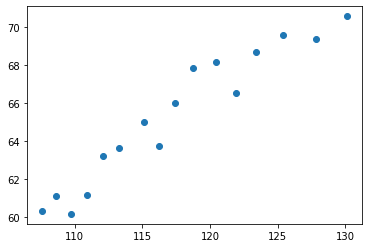

In [7]:
# plot input vs output
pyplot.scatter(x, y)

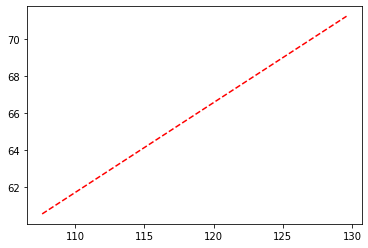

In [8]:
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b)

# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')

y = 0.48488 * x + 8.38067


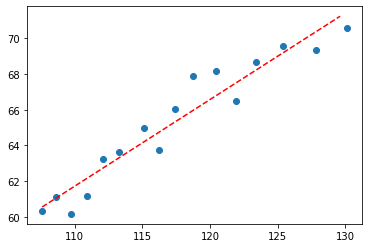

In [9]:
# fit a straight line to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b):
	return a * x + b

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
# choose the input and output variables
x, y = data[:, 4], data[:, -1]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [10]:
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

y = 3.25444 * x + -0.01170 * x^2 + -155.02799


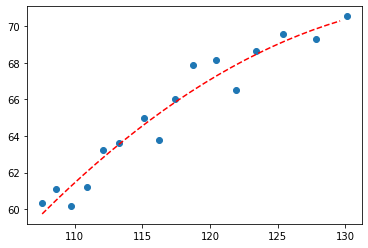

In [11]:
# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
# choose the input and output variables
x, y = data[:, 4], data[:, -1]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

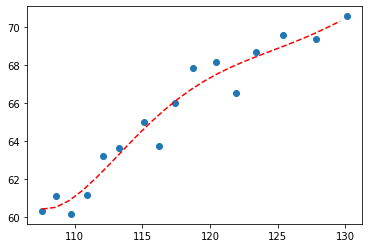

In [12]:
# fit a fifth degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
# choose the input and output variables
x, y = data[:, 4], data[:, -1]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, e, f = popt
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

More Sine and Cosine examples

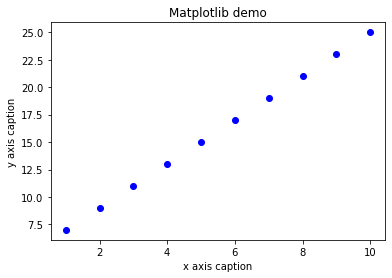

In [13]:
import numpy as np 
from matplotlib import pyplot as plt 

x = np.arange(1,11) 
y = 2 * x + 5 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y,"ob") 
plt.show() 

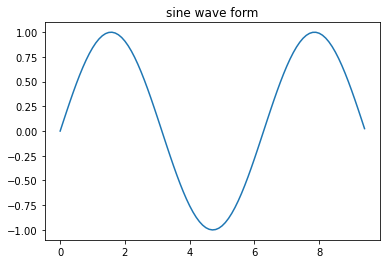

In [14]:
import numpy as np 
import matplotlib.pyplot as plt  

# Compute the x and y coordinates for points on a sine curve 
x = np.arange(0, 3 * np.pi, 0.1) 
y = np.sin(x) 
plt.title("sine wave form") 

# Plot the points using matplotlib 
plt.plot(x, y) 
plt.show() 

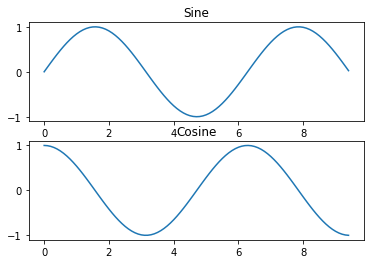

In [15]:
import numpy as np 
import matplotlib.pyplot as plt  
   
# Compute the x and y coordinates for points on sine and cosine curves 
x = np.arange(0, 3 * np.pi, 0.1) 
y_sin = np.sin(x) 
y_cos = np.cos(x)  
   
# Set up a subplot grid that has height 2 and width 1, 
# and set the first such subplot as active. 
plt.subplot(2, 1, 1)
   
# Make the first plot 
plt.plot(x, y_sin) 
plt.title('Sine')  
   
# Set the second subplot as active, and make the second plot. 
plt.subplot(2, 1, 2) 
plt.plot(x, y_cos) 
plt.title('Cosine')  
   
# Show the figure. 
plt.show()


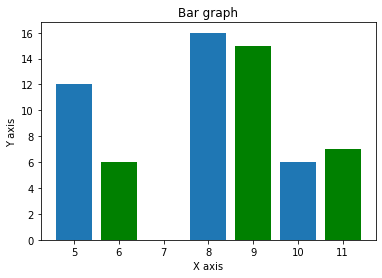

In [16]:
from matplotlib import pyplot as plt 
x = [5,8,10] 
y = [12,16,6]  

x2 = [6,9,11] 
y2 = [6,15,7] 
plt.bar(x, y, align = 'center') 
plt.bar(x2, y2, color = 'g', align = 'center') 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis')  

plt.show()